<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Danial Ayati

**Student ID**: 99101246

# Linear Regression

In this exercise, we want to examine **linear regression**. For this purpose, we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load

**Note**: For the sake of simplicity, we will only focus on estimating the **heating load** in this problem. Also, please note that we have some inline questions in this notebook, for which you should write your answers in the **Answer** section below each question.

## Importing Libraries

First we import libraries that we need for this assignment.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [3]:
X, Y = None, None
data = pd.read_csv('q1.csv')

X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']].values
Y = data[['Y1']].values

print(X.shape)
print(Y.shape)

(768, 8)
(768, 1)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

In [5]:
x_bar = np.mean(X,axis=0)
sigma = np.std(X,axis=0)
X_norm = (X - x_bar)/sigma

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [6]:
X = np.concatenate((np.ones(shape=Y.shape),X_norm),axis=1)

print(X.shape)

(768, 9)


## Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [10]:
def loss(X, Y, w):
    m, n = X.shape
    loss = None
    cal_var = np.matmul(X,w) - Y
    loss = 1/m * np.matmul(cal_var.T,cal_var)
    return loss

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

Question: What is the answer to this problem in terms of $X$ and $Y$?

Answer: $\hat{w}_{mle} = (X^T X)^{-1}X^T Y$

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [11]:
def direct_method(X, Y):
    w = None
    mat = np.linalg.inv(np.matmul(X.T,X))
    w = np.matmul(np.matmul(mat,X.T),Y)  
    return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [12]:
w = direct_method(X, Y) # calculating w using direct method
print(f"loss for this problem using direct method is {loss(X, Y, w)}")

loss for this problem using direct method is [[8.52285291]]


## Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.

**Question**: Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

**Answer**: $\frac{2}{m}X^T(X\mathbf{w}-Y)$

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [14]:
def gradient(X, Y, w):
    m, n = X.shape
    grad = None
    grad = 2*np.matmul(X.T,np.matmul(X,w)-Y)/m
    return grad

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [15]:
def gradient_descent(X, Y, alpha, num_iter):
    m, n = X.shape
    w = np.random.randn(n, 1)
    loss_history = np.zeros(num_iter)

    for i in range(num_iter):
        loss_history[i] = np.mean((X.dot(w) - Y) ** 2)
        gradient = 2 / m * X.T.dot(X.dot(w) - Y)
        w -= alpha * gradient

    return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure.

**Question**: Discuss the effect of the learning rate and find the best value of this parameter.

**Answer**: The learning rate is a crucial hyperparameter in the gradient descent algorithm, as it determines the step size taken during each iteration. Choosing an appropriate learning rate is essential to ensure convergence and efficient learning.

By analyzing the plots of the loss history for different learning rates, we can make observations about their convergence behavior. Among the tested learning rates, 0.22 stands out as the most optimal choice. It achieves a good balance between convergence speed and performance.

Learning rates of 0.1, 0.14, 0.18, and 0.26 also exhibit acceptable convergence, although they require more iterations to reach convergence compared to 0.22. These learning rates still contribute to effective learning in this context.

However, it is important to note that higher learning rates, such as 0.3, lead to divergence of the algorithm and prevent convergence. This highlights the need for caution when selecting learning rates, as excessively high values can hinder learning.

Based on these observations, a learning rate of approximately 0.22 emerges as the optimal choice for this problem, providing a good trade-off between convergence speed and performance.

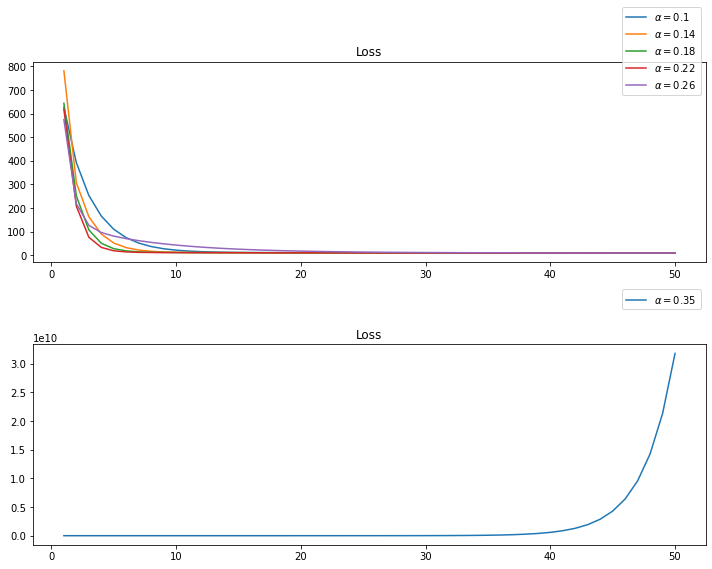

In [16]:
num_iter = 50
alpha = np.linspace(0.1, 0.26, num=5, endpoint=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

loss_history = np.zeros((num_iter, 6))
w = np.zeros((X.shape[1], 6, 1))

for i in range(5):
    w[:, i], loss_history[:, i] = gradient_descent(X, Y, alpha[i], num_iter)
    ax1.plot(np.arange(1, num_iter + 1), loss_history[:, i])

ax1.set_title('Loss')
ax1.legend([r'$\alpha=0.1$', r'$\alpha=0.14$', r'$\alpha=0.18$', r'$\alpha=0.22$', r'$\alpha=0.26$'],
           bbox_to_anchor=(1, 1.3), ncol=1)

w[:, 5], loss_history[:, 5] = gradient_descent(X, Y, 0.3, num_iter)
ax2.plot(np.arange(1, num_iter + 1), loss_history[:, 5])

ax2.set_title('Loss')
ax2.legend([r'$\alpha=0.35$'], bbox_to_anchor=(1, 1.3), ncol=1)

plt.tight_layout()
plt.show()

## Conclusion

Compare the answer of two different methods that we used earlier.

**Question**: Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

**Answer**: "The direct method and gradient descent are two commonly used approaches for solving linear regression problems.

The direct method, which involves solving the normal equation by inverting the matrix $X^TX$, provides an exact solution for the weight matrix. It is computationally efficient when dealing with small to medium-sized datasets and when the matrix $X^TX$ is invertible. However, it may become numerically unstable and computationally expensive for high-dimensional datasets.

On the other hand, gradient descent is an iterative optimization algorithm that does not require matrix inversion. It can handle high-dimensional datasets more effectively and is generally more scalable. However, it requires careful tuning of the learning rate and the number of iterations to ensure convergence to the minimum of the loss function. The computational cost of gradient descent may be higher than the direct method, especially for large datasets.

In summary, the choice between the direct method and gradient descent depends on the characteristics of the dataset. For small to medium-sized datasets with invertible $X^TX$ matrices, the direct method provides an efficient and exact solution. For large or high-dimensional datasets, where computational efficiency and scalability are important, gradient descent is a more suitable approach."

Please note that this is a revised version of your answer. Feel free to make any adjustments or additions based on your specific requirements and guidelines

## (Additional Part) Stochastic Gradient Descent

When the number of data points becomes large, calculating the gradient becomes very complicated. In these circumstances, we use **Stochastic Gradient Descent**. In this algorithm, instead of using all of the data points to calculate the gradient, we use only a small number of them. We choose these small number of points randomly in each iteration. Implement this algorithm, and use it to calculate $w$, and then compare the result with the preceding parts.

In [17]:
def stochastic_gradient_descent(X, Y, k, alpha, num_iter):

    m, n = X.shape
    w, loss_history = None, None 
    m, n = X.shape
    w = np.random.randn(n, 1)
    loss_history = np.zeros(num_iter)

    for i in range(num_iter):

        idx = np.random.randint(m, size=k)
        X_batch = X[idx, :]
        Y_batch = Y[idx, :]
        loss_batch = loss(X_batch, Y_batch, w)
        grad = gradient(X_batch, Y_batch, w)
        w = w - alpha * grad
        loss_history[i] = loss_batch

    return w, loss_history

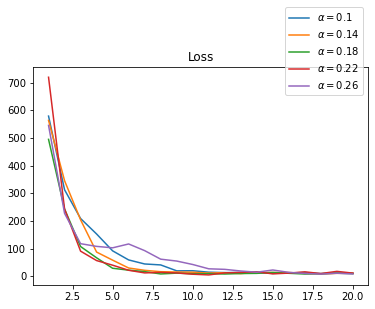

In [19]:
num_iter = 20
alpha = np.linspace(0.1, 0.26, num=5, endpoint=True)
k = 100

fig, ax = plt.subplots()

loss_history = np.zeros((num_iter, 5))
w = np.zeros((X.shape[1], 5, 1))

for i in range(5):
    w[:, i], loss_history[:, i] = stochastic_gradient_descent(X, Y, k, alpha[i], num_iter)
    ax.plot(np.arange(1, num_iter + 1), loss_history[:, i])

ax.set_title('Loss')
ax.legend([r'$\alpha=0.1$', r'$\alpha=0.14$' ,r'$\alpha=0.18$', r'$\alpha=0.22$', r'$\alpha=0.26$'], bbox_to_anchor=(1,1.3), ncol=1);
